In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/voicegender/voice.csv


import the data

In [2]:
Data=pd.read_csv("/kaggle/input/voicegender/voice.csv")

In [3]:
Data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


We can see our data above.

Normalization:

the goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information. Normalization is also required for some algorithms to model the data correctly.

In [4]:
Data.label=[1 if each == "male" else 0 for each in Data.label]
y=Data.label.values
x=Data.drop(["label"], axis=1)

In [5]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [6]:
x=(x-np.min(x))/(np.max(x)-np.min(x)).values

In [7]:
x

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.096419,0.473409,0.084125,0.060063,0.204956,0.254828,0.367853,0.208279,0.635798,0.564526,0.000000,0.096419,0.157706,0.030501,0.981526,0.000000,0.006452,0.000000,0.000000,0.000000
1,0.125828,0.505075,0.116900,0.077635,0.215683,0.246961,0.644279,0.483766,0.630964,0.591578,0.000000,0.125828,0.287642,0.031140,0.834600,0.000407,0.006452,0.002144,0.002146,0.056449
2,0.179222,0.675536,0.102873,0.034284,0.385912,0.457148,0.885255,0.782275,0.442738,0.548382,0.000000,0.179222,0.236945,0.030264,0.954963,0.000060,0.006452,0.000357,0.000358,0.049885
3,0.528261,0.554611,0.587559,0.389906,0.715802,0.407358,0.031549,0.001613,0.923261,0.856457,0.299565,0.528261,0.183442,0.041287,0.834600,0.065659,0.006452,0.025375,0.025393,0.265043
4,0.452195,0.627209,0.454272,0.317627,0.707515,0.474474,0.027742,0.001732,0.958736,0.926348,0.372362,0.452195,0.279190,0.036829,0.929285,0.238994,0.006452,0.250536,0.250715,0.223380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.436911,0.684871,0.570361,0.198513,0.686256,0.577704,0.046854,0.003489,0.921665,0.901057,0.717272,0.436911,0.698762,0.380813,0.904450,0.279703,0.006452,0.192280,0.192418,0.173674
3164,0.362946,0.731172,0.262871,0.171937,0.702595,0.621185,0.015961,0.000333,0.912549,0.834545,0.048868,0.362946,0.732760,0.126776,0.981526,0.305791,0.075269,0.167977,0.166667,0.298053
3165,0.484949,0.799042,0.690337,0.134329,0.786967,0.742124,0.050161,0.003469,0.855587,0.765849,0.028592,0.484949,0.847759,0.153011,0.981526,0.164908,0.006452,0.134024,0.134120,0.208885
3166,0.492516,0.745692,0.695311,0.175136,0.767804,0.681107,0.041908,0.002539,0.870307,0.792241,0.757865,0.492516,0.641561,0.127158,0.834600,0.265621,0.006452,0.164046,0.164163,0.333559


Train Test Split


We divide our data set as train and test set. Test size is 20%.

Random state: Every time the data set is split, it is split from elsewhere. 
Random_state is used to prevent this and to  divide data from the same place.


In [8]:
from sklearn.model_selection import train_test_split


In [9]:
#here we create x_train, y_train, x_test y_test arrays
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

Initializing Parameters

In [10]:
#We initialize weights and bias (w,b)
def initialize_weights_bias(dimension):
    w=np.full((dimension,1),0.01)
    b=0.0
    return w,b

Forward Propagation:

Forward propagation  refers to the calculation and storage of intermediate variables (including outputs) for a neural network in order from the input layer to the output layer.

In [11]:
#calculation of z(sigmoid function)
def sigmoid(z):
    y_head=1/(1+np.exp(-z))
    return y_head


In [12]:
y_head=sigmoid(0)
y_head

0.5

In [13]:
#implementing forward propagation
def forward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -(y_train*np.log(y_head)+(1-y_train)*np.log(1-y_head))
    cost = np.sum(loss)/(x_train.shape[1]) 
    return cost


Gradient Descent

 if cost is high it means that we make wrong prediction. 
 So we need to decrease cost. 
 In order to decrease cost, we need to update weights and bias.
 So we use gradient descent.
 Gradient descent is an optimization algorithm used to find the values of parameters (coefficients) of a function (f) that minimizes a cost function (cost).

In [14]:
def forward_backward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -(y_train*np.log(y_head)+(1-y_train)*np.log(1-y_head))
    cost = np.sum(loss)/(x_train.shape[1])
    #backward propagation
    derivative_weight=(np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias=np.sum(y_head-y_train)/x_train.shape[1]
    gradients={"derivative_weight" : derivative_weight,"derivative_bias" : derivative_bias}
    return cost,gradients


In [15]:
#updating parameters
def update(w,b,x_train,y_train,learning_rate, number_of_iteration):
    cost_list= []
    
    index= []
    
    for i in range(number_of_iteration):
        cost,gradients= forward_backward_propagation(w,b,x_train,y_train)
        
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i%100==0:
            cost_list.append(cost)
            index.append(i)
        
        print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    
    parameters = {"derivative_weight": w,"derivative_bias": b}
    plt.plot(index,cost_list)
    plt.xlabel("Number of iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

    
    

Prediction

In [16]:
def predict(w,b,x_test):
    z=sigmoid(np.dot(w.T,x_test)+b)
    y_prediction=np.zeros((1,x_test.shape[1]))
    
    for i in range (z.shape[1]):
        if z[0,i]<=0.5:
            y_prediction[0,i]==0
        else:
            y_prediction[0,i]==1
            
    return y_prediction
            
    

Put them all together!!!

In [17]:
def Logistic_Regression(x_train, y_train, x_test, y_test,learning_rate, number_of_iteration):
    dimension=x_train.shape[0]
    
    w,b=initialize_weights_bias(dimension)
    parameters, gradient, cost_list=update(w, b, x_train, y_train, learning_rate,number_of_iteration)
    
    y_prediction_test= predict(parameters["derivative_weight"],parameters["derivative_bias"],x_test)
    y_prediction_train= predict(parameters["derivative_weight"],parameters["derivative_bias"],x_train)
    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    

    


Cost after iteration 0: 0.695733
Cost after iteration 1: 0.693003
Cost after iteration 2: 0.690538
Cost after iteration 3: 0.688270
Cost after iteration 4: 0.686150
Cost after iteration 5: 0.684143
Cost after iteration 6: 0.682223
Cost after iteration 7: 0.680369
Cost after iteration 8: 0.678570
Cost after iteration 9: 0.676813
Cost after iteration 10: 0.675092
Cost after iteration 11: 0.673402
Cost after iteration 12: 0.671737
Cost after iteration 13: 0.670096
Cost after iteration 14: 0.668476
Cost after iteration 15: 0.666875
Cost after iteration 16: 0.665293
Cost after iteration 17: 0.663727
Cost after iteration 18: 0.662178
Cost after iteration 19: 0.660644
Cost after iteration 20: 0.659125
Cost after iteration 21: 0.657622
Cost after iteration 22: 0.656133
Cost after iteration 23: 0.654658
Cost after iteration 24: 0.653197
Cost after iteration 25: 0.651749
Cost after iteration 26: 0.650316
Cost after iteration 27: 0.648895
Cost after iteration 28: 0.647488
Cost after iteration 29:

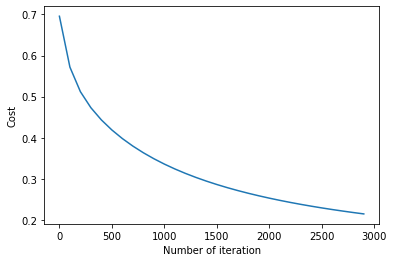

train accuracy: 50.78926598263615 %
test accuracy: 46.845425867507885 %


In [18]:
Logistic_Regression(x_train, y_train, x_test, y_test,learning_rate = 0.1, number_of_iteration = 3000)